# SHscore and evolutionary distance

Here you can find the code to reproduce the results shown in the section **Experiment 2: SHscore and evolutionary distance** of the paper. SHscores and MRCA distances have been precomputed because the computation, here, would take too much time. 

You may refer to the other notebooks in the current repository or to the documentation at the official [PhyliCS repository](https://github.com/bioinformatics-polito/PhyliCS) to learn how to compute the SHscore.

## Experiment 1: SHscore VS MRCA distance

In [1]:
import os, sys
import argparse
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr, kruskal
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn

def correlate_and_plot(shscores, mrca_dists, outpath):
    coef, p = pearsonr(shscores, mrca_dists)
    x = shscores
    y = mrca_dists 
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y)
    y_max = np.max(y)
    x_bins = np.linspace(x_min,x_max,50)
    y_bins = np.linspace(y_min,y_max,20)
    data , x_e, y_e = np.histogram2d( x, y, bins = [x_bins, y_bins], density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
    z[np.where(np.isnan(z))] = 0.0
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter( x, y, c=z)
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    plt.colorbar(cm.ScalarMappable(norm = norm), ax=plt.gca())
    plt.colorbar()
    plt.suptitle('SHscore vs MRCA distance', fontsize=24)
    plt.title("Pearson correlation coefficient = {:.3}, pval = {:.3g}".format(coef, p), fontsize=18)
    plt.xlabel("SHscore", fontsize=20)
    plt.ylabel("MRCA distance", fontsize=20)
    plt.gcf().set_size_inches(7,7)
    plt.savefig(os.path.join(outpath, "shscores_mrcadist_pearson.png"))
    plt.close("all")
    return coef, p

DATA_DIR = "data/simulations/100Kcells"

# Read table containing the SHscore and the MRCA distance computed for each pair of samples
df = pd.read_csv(os.path.join(DATA_DIR, "shscores_mrcadist.tsv"), sep="\t")
c, p = correlate_and_plot(df["sh_score"].values, df["mrca_distance"].values, DATA_DIR)
print("Pearson correlation coefficient = " + str(c) + ", pvalue = " + str(p))

Pearson correlation coefficient = 0.6278206649799962, pvalue = 1.0018740520679089e-110


![SHscore vs MRCA distance correlation](data/simulations/100Kcells/shscores_mrcadist_pearson.png)

In the following, you find the code to run the Kruskal-Wallis test between the full set of SHscores (4950) and the sampled ones (1000)

In [2]:
df_scores = pd.read_csv(os.path.join(DATA_DIR, "shscores.tsv"), sep="\t")
df_merged = pd.DataFrame()

df_merged["SHscore_full"] = df_scores["sh_score"]
df_merged["SHscore_subset"] = df["sh_score"]
s, p = kruskal(df_scores["sh_score"], df["sh_score"])
print("Kruskal-Wallis test pvalue = {:.3g}".format(p))


Kruskal-Wallis test pvalue = 0.941


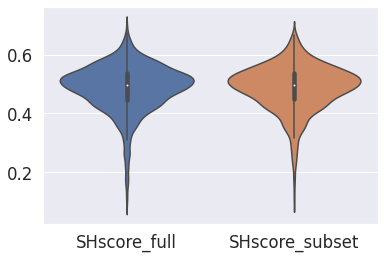

In [3]:
import seaborn as sns

sns.set(font_scale=1.5)
sns.violinplot(data=df_merged)
plt.savefig(os.path.join(DATA_DIR, "shscores_full_vs_subset_violins.png"))

## Experiment 2: SHscore for different evolutionary spans

In [4]:
DATA_DIR = "data/simulations/"

df2500 = pd.read_csv(os.path.join(DATA_DIR, "spatial/spatial_scores.csv"))

# Compute stats on the distribution of the SHscores in the hom-scenario (spatial segregation, 2.5K cell trees)
first_quartile = df2500["Hom"].quantile(0.25)
median = df2500["Hom"].quantile(0.5)
third_quartile = df2500["Hom"].quantile(0.75)
IQR = third_quartile - first_quartile

print("2.5K cell tree -  SHscore stats:\n\tmedian = {:.3}\n\tIQR = {:.3}".format(median, IQR))

2.5K cell tree -  SHscore stats:
	median = 0.152
	IQR = 0.0641


In [5]:
df10K = pd.read_csv(os.path.join(DATA_DIR, "10Kcells/shscores_mrcadist.tsv"), sep="\t")

# Compute stats on the distribution of the SHscores in the 10Kcells experiment (spatial segregation, 10K cell trees)
first_quartile = df10K["sh_score"].quantile(0.25)
median = df10K["sh_score"].quantile(0.5)
third_quartile = df10K["sh_score"].quantile(0.75)
IQR = third_quartile - first_quartile

print("10K cell tree -  SHscore stats:\n\tmedian = {:.3}\n\tIQR = {:.3}".format(median, IQR))

10K cell tree -  SHscore stats:
	median = 0.278
	IQR = 0.0613


In [6]:
df100K = pd.read_csv(os.path.join(DATA_DIR, "100Kcells/shscores.tsv"), sep="\t")

# Compute stats on the distribution of the SHscores in the 10Kcells experiment (spatial segregation, 10K cell trees)
first_quartile = df100K["sh_score"].quantile(0.25)
median = df100K["sh_score"].quantile(0.5)
third_quartile = df100K["sh_score"].quantile(0.75)
IQR = third_quartile - first_quartile

print("100K cell tree -  SHscore stats:\n\tmedian = {:.3}\n\tIQR = {:.3}".format(median, IQR))

100K cell tree -  SHscore stats:
	median = 0.498
	IQR = 0.0923


<AxesSubplot:ylabel='Density'>

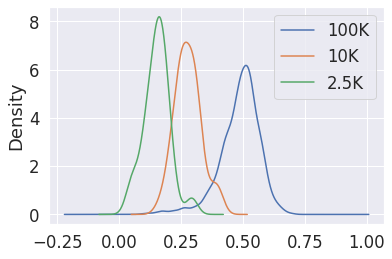

In [7]:
df_ = pd.DataFrame()
df_["100K"] = df100K["sh_score"]
df_["10K"] = df10K["sh_score"]
df_["2.5K"] = df2500["Hom"]

df_.plot.kde()

In [8]:
plt.savefig(os.path.join(DATA_DIR, "shscore_multiple_heights_distribution.png"))

<Figure size 432x288 with 0 Axes>